In [1]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Add project root to path
sys.path.append(os.path.abspath('..')) 

try:
    from src.data_loader import get_raw_stats, load_and_process_in_chunks
    print("Successfully imported optimized modules.")
except ImportError as e:
    print(f"Error importing from src: {e}")

# Configuration
RAW_DATA_PATH = "../data/raw/complaints.csv" 
PROCESSED_DATA_PATH = "../data/processed/filtered_complaints.csv"

Successfully imported optimized modules.


Calculating statistics on raw data (Memory Safe Mode)...
Scanning raw data at ../data/raw/complaints.csv for statistics...
Processed 9609797 rows...
Scan complete. Total rows: 9609797


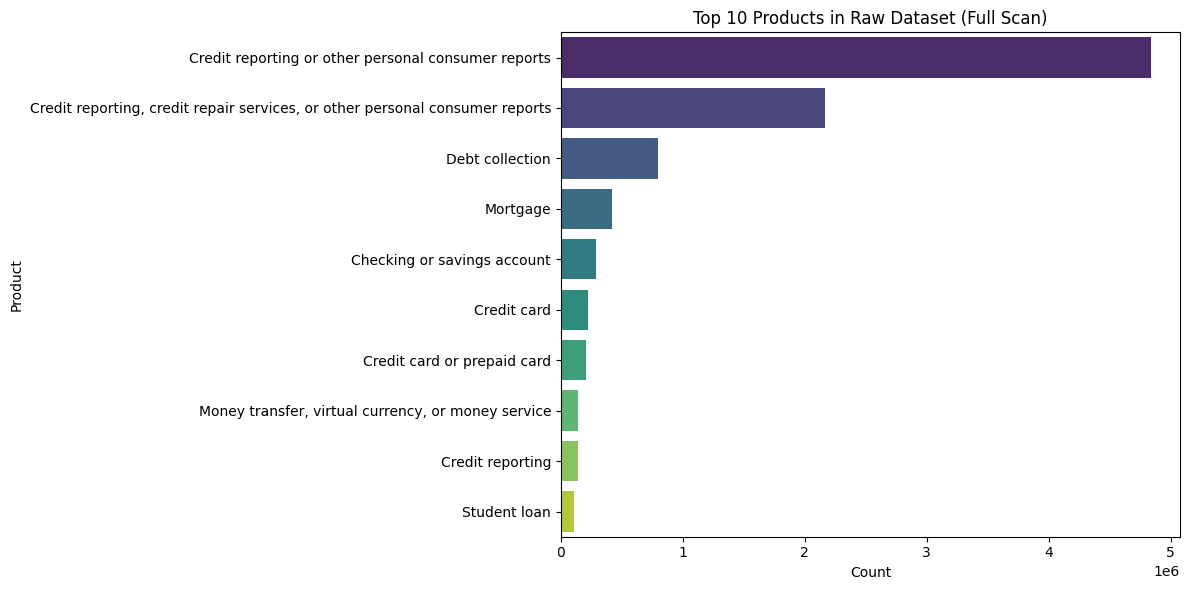

Total Rows Scanned: 9,609,797
Rows with MISSING narratives: 6,629,041 (69.0%)
Rows with VALID narratives: 2,980,756


In [2]:
# Instead of loading the whole file (which crashes RAM), 
# we use our helper function to scan the file in chunks for stats.

print("Calculating statistics on raw data (Memory Safe Mode)...")
try:
    product_counts, total_rows, missing_narratives = get_raw_stats(RAW_DATA_PATH)
    
    if product_counts is not None:
        # 1. Visualize Top Products
        plt.figure(figsize=(12, 6))
        top_10 = product_counts.head(10)
        sns.barplot(x=top_10.values, y=top_10.index, hue=top_10.index, palette="viridis", legend=False)
        plt.title("Top 10 Products in Raw Dataset (Full Scan)")
        plt.xlabel("Count")
        plt.tight_layout()
        plt.show()
        
        # 2. Missing Narratives
        print(f"Total Rows Scanned: {total_rows:,}")
        print(f"Rows with MISSING narratives: {missing_narratives:,} ({missing_narratives/total_rows:.1%})")
        print(f"Rows with VALID narratives: {total_rows - missing_narratives:,}")
        
except Exception as e:
    print(f"An error occurred during EDA: {e}")

In [3]:
# This step loads the file, filters for our 5 specific products, 
# cleans the text, and returns only the relevant data.
# This prevents "Out of Memory" errors.

try:
    df_clean = load_and_process_in_chunks(RAW_DATA_PATH)
    print("\nData successfully processed and loaded into memory.")
    display(df_clean.head(3))
except Exception as e:
    print(f"Processing failed: {e}")

Starting chunked processing (Filter -> Clean -> Accumulate)...
Processed chunk 148. Collected 362256 valid rows so far...
Error in processing: Error tokenizing data. C error: out of memory
Tip: Check if 'Complaint ID' or 'Product' columns exist in your CSV.
Processing failed: Error tokenizing data. C error: out of memory


In [4]:
if 'df_clean' in locals():
    # 1. Product Distribution (Cleaned Data)
    plt.figure(figsize=(10, 6))
    
    order = df_clean['product_category'].value_counts().index
    sns.countplot(y='product_category', data=df_clean, order=order, hue='product_category', palette="pastel", legend=False)
    
    plt.title("Distribution of Processed Complaints by Category")
    plt.xlabel("Number of Complaints")
    plt.tight_layout()
    plt.show()

    # 2. Narrative Length Analysis
    plt.figure(figsize=(12, 6))
    sns.histplot(df_clean['word_count'], bins=50, kde=True, color='skyblue')
    plt.title("Distribution of Complaint Word Counts (Cleaned)")
    plt.xlabel("Word Count")
    plt.xlim(0, 1000)
    plt.show()

    print("Word Count Statistics:")
    print(df_clean['word_count'].describe())

In [5]:
if 'df_clean' in locals():
    # Ensure the processed directory exists
    os.makedirs(os.path.dirname(PROCESSED_DATA_PATH), exist_ok=True)

    # Save to CSV
    df_clean.to_csv(PROCESSED_DATA_PATH, index=False)
    print(f"Cleaned data saved successfully to: {os.path.abspath(PROCESSED_DATA_PATH)}")
    
    # Verify file size
    if os.path.exists(PROCESSED_DATA_PATH):
        size_mb = os.path.getsize(PROCESSED_DATA_PATH) / (1024*1024)
        print(f"File size: {size_mb:.2f} MB")